# Import Dependencies

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST, CIFAR10, ImageFolder
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split, DataLoader
from cnn import Classic_CNN
# hyper parameters
batch_size = 64
epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# MNIST Implementation

## Image Analysis and Pre-processing

In [2]:
# download the dataset
dataset = MNIST(root='./data/',download=True)

In [3]:
type(dataset)

torchvision.datasets.mnist.MNIST

Object of Image in PIL form: <PIL.Image.Image image mode=L size=28x28 at 0x204EE894200>
Label: 5


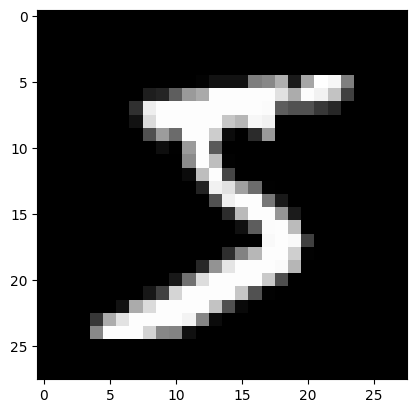

In [4]:
image,label = dataset[0]
print(f'Object of Image in PIL form: {image}\nLabel: {label}')
plt.imshow(image,cmap='gray')

In [5]:
train_data = MNIST(root='./data/',train=True,transform=transforms.ToTensor())
train_data,val_data = random_split(train_data,[50000,10000])
test_data = MNIST(root='./data/',train=False,transform=transforms.ToTensor())
print(f'Lenght of trainset: {len(train_data)}\nLength of validation set: {len(val_data)}\nLength of testset: {len(test_data)}')

Lenght of trainset: 50000
Length of validation set: 10000
Length of testset: 10000


Shape of image: torch.Size([1, 28, 28])
 Label: 8


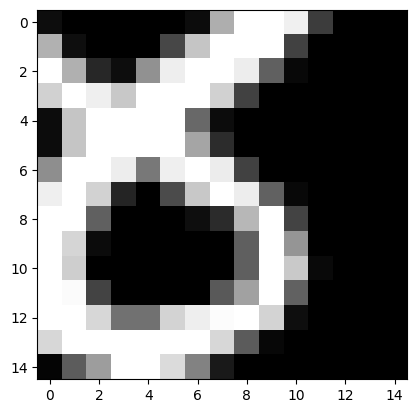

In [6]:
image_tensor,label = train_data[0]
print(f'Shape of image: {image_tensor.shape}\n Label: {label}')
plt.imshow(image_tensor[0,10:25,10:25],cmap='gray')

In [7]:
# create batches of train and validation data for efficient training and validation steps
train_data_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
val_data_loader = DataLoader(val_data,batch_size=batch_size,shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=batch_size)

## Model

Epoch 1/10, Loss: 0.2034, Validation Loss: 0.0681, Validation Accuracy: 98.01%
Epoch 2/10, Loss: 0.0617, Validation Loss: 0.0491, Validation Accuracy: 98.40%
Epoch 3/10, Loss: 0.0503, Validation Loss: 0.0475, Validation Accuracy: 98.45%
Epoch 4/10, Loss: 0.0431, Validation Loss: 0.0416, Validation Accuracy: 98.67%
Epoch 5/10, Loss: 0.0400, Validation Loss: 0.0517, Validation Accuracy: 98.59%
Epoch 6/10, Loss: 0.0350, Validation Loss: 0.0468, Validation Accuracy: 98.53%
Epoch 7/10, Loss: 0.0299, Validation Loss: 0.0606, Validation Accuracy: 98.34%
Epoch 8/10, Loss: 0.0299, Validation Loss: 0.0421, Validation Accuracy: 98.79%
Epoch 9/10, Loss: 0.0238, Validation Loss: 0.0524, Validation Accuracy: 98.70%
Epoch 10/10, Loss: 0.0271, Validation Loss: 0.0475, Validation Accuracy: 98.86%


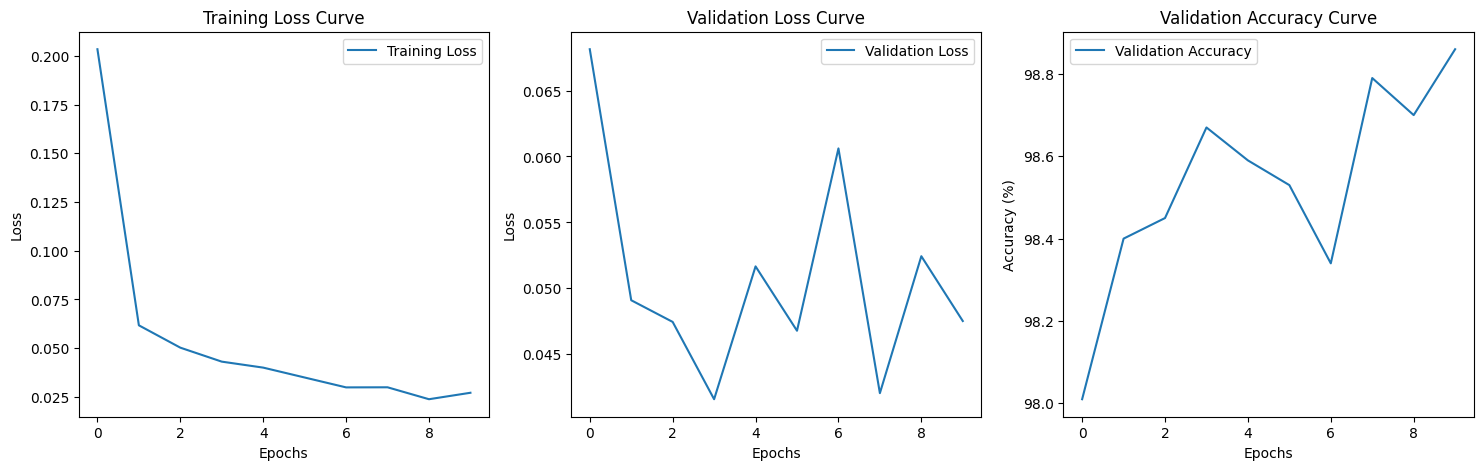

In [8]:
model = Classic_CNN(input_channels=1,output_channels=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.005)
# training
model.fit(train_loader=train_data_loader,val_loader=val_data_loader,criterion=criterion,optimizer=optimizer,epochs=epochs,device=device)


In [9]:
# validation
model.validate(test_loader=test_data_loader,criterion = criterion,device=device)

Test Accuracy: 98.89%
Validation Loss: 0.0441
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



(0.044094577993494144, 98.89)

# CIFAR10 Implementation

## Image Analysis and pre-processing

In [10]:
dataset = CIFAR10(root='./data/',download=True)

Files already downloaded and verified


In [11]:
train_data = CIFAR10(root='./data/',train=True,transform=transforms.ToTensor())
train_data,val_data = random_split(train_data,[40000,10000])
test_data = CIFAR10(root='./data/',train=False,transform=transforms.ToTensor())

In [12]:
classes = dataset.classes

Image dimensions: torch.Size([3, 32, 32])
Label:horse


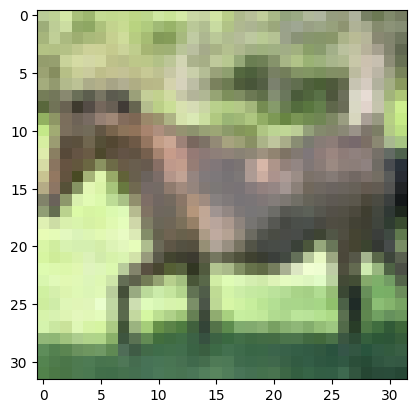

In [13]:
image_tensor,label = train_data[0]
plt.imshow(image_tensor.permute(1,2,0))
print(f'Image dimensions: {image_tensor.shape}\nLabel:{classes[label]}')

In [14]:
train_data_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True,pin_memory=True)
val_data_loader = DataLoader(val_data,batch_size=batch_size*2,shuffle=True,pin_memory=True)
test_data_loader = DataLoader(test_data,batch_size=batch_size*2,shuffle=True,pin_memory=True)


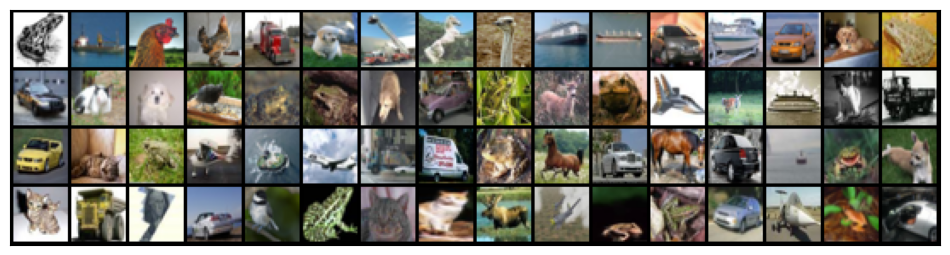

In [15]:
def show_batch(dl):
    for images,labels in dl:
        fig,ax = plt.subplots(figsize = (12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
show_batch(train_data_loader)


## Model

In [16]:
input_channels = 3
output_channels = 10

model = Classic_CNN(input_channels=input_channels,output_channels=output_channels)
model

Classic_CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc2): Linear(in_features=128, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)

Epoch 1/10, Loss: 1.7445, Validation Loss: 1.5310, Validation Accuracy: 44.12%
Epoch 2/10, Loss: 1.4398, Validation Loss: 1.3659, Validation Accuracy: 51.13%
Epoch 3/10, Loss: 1.2961, Validation Loss: 1.2850, Validation Accuracy: 52.93%
Epoch 4/10, Loss: 1.2001, Validation Loss: 1.1755, Validation Accuracy: 58.22%
Epoch 5/10, Loss: 1.1192, Validation Loss: 1.1539, Validation Accuracy: 59.03%
Epoch 6/10, Loss: 1.0630, Validation Loss: 1.0898, Validation Accuracy: 60.99%
Epoch 7/10, Loss: 1.0062, Validation Loss: 1.0533, Validation Accuracy: 62.67%
Epoch 8/10, Loss: 0.9588, Validation Loss: 1.0459, Validation Accuracy: 62.44%
Epoch 9/10, Loss: 0.9245, Validation Loss: 1.0346, Validation Accuracy: 63.20%
Epoch 10/10, Loss: 0.8859, Validation Loss: 0.9950, Validation Accuracy: 65.32%


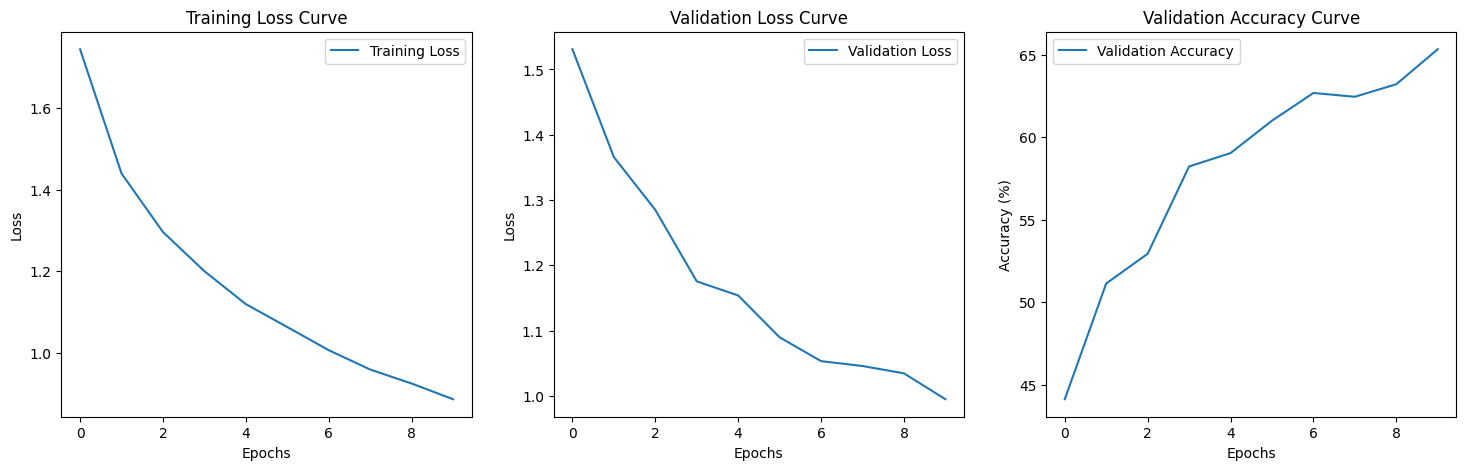

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
model.fit(train_loader=train_data_loader,val_loader=val_data_loader,criterion=criterion,optimizer=optimizer,epochs=epochs,device=device)

In [18]:
model.validate(test_loader=test_data_loader,criterion=criterion,device=device)

Test Accuracy: 65.15%
Validation Loss: 1.0017
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1000
           1       0.77      0.78      0.77      1000
           2       0.55      0.53      0.54      1000
           3       0.44      0.46      0.45      1000
           4       0.65      0.55      0.60      1000
           5       0.49      0.61      0.54      1000
           6       0.75      0.72      0.74      1000
           7       0.68      0.72      0.70      1000
           8       0.76      0.80      0.78      1000
           9       0.77      0.61      0.68      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



(1.0016923758048046, 65.15)

Actual Label: frog
Predicted Label: frog


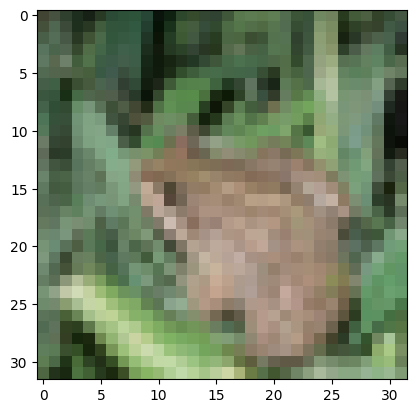

In [30]:
import numpy as np
image,label = test_data[4]
plt.imshow(image.permute(1,2,0))
prediction = model.predict(images=torch.tensor(np.expand_dims(image,axis=0)),device=device)[0]
print(f'Actual Label: {classes[label]}\nPredicted Label: {classes[prediction]}')